# Web Phishing Detection

## Data PreProcessing

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_rows = None #to show all rows
pd.options.display.max_columns = None #to show all columns

Reading Dataset

In [3]:
df = pd.read_csv('dataset_website.csv')

Checking Desccriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [5]:
df.Result.isnull().any()

False

In [6]:
df.isnull().any()

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

### Samples from Every atribute of the Dataframe

In [7]:
for (colname,colval) in df.iteritems():
    print(colname," : ", colval.values[:])

index  :  [    1     2     3 ... 11053 11054 11055]
having_IPhaving_IP_Address  :  [-1  1  1 ...  1 -1 -1]
URLURL_Length  :  [ 1  1  0 ... -1 -1 -1]
Shortining_Service  :  [1 1 1 ... 1 1 1]
having_At_Symbol  :  [1 1 1 ... 1 1 1]
double_slash_redirecting  :  [-1  1  1 ...  1  1  1]
Prefix_Suffix  :  [-1 -1 -1 ... -1 -1 -1]
having_Sub_Domain  :  [-1  0 -1 ...  1 -1 -1]
SSLfinal_State  :  [-1  1 -1 ... -1 -1 -1]
Domain_registeration_length  :  [-1 -1 -1 ... -1  1  1]
Favicon  :  [ 1  1  1 ...  1 -1  1]
port  :  [1 1 1 ... 1 1 1]
HTTPS_token  :  [-1 -1 -1 ...  1  1  1]
Request_URL  :  [ 1  1  1 ...  1 -1 -1]
URL_of_Anchor  :  [-1  0  0 ...  0 -1 -1]
Links_in_tags  :  [ 1 -1 -1 ... -1  1  0]
SFH  :  [-1 -1 -1 ... -1 -1 -1]
Submitting_to_email  :  [-1  1 -1 ...  1  1  1]
Abnormal_URL  :  [-1  1 -1 ...  1  1  1]
Redirect  :  [0 0 0 ... 0 0 0]
on_mouseover  :  [ 1  1  1 ...  1 -1  1]
RightClick  :  [1 1 1 ... 1 1 1]
popUpWidnow  :  [ 1  1  1 ...  1 -1  1]
Iframe  :  [1 1 1 ... 1 1 1]
age_of_do

In [8]:
# r = df.Result.value_counts()
# res[-1]

In [9]:
df.Result.value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

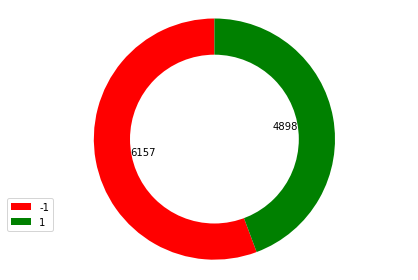

In [10]:
# Pie chart (plots value counts in this case)
labels = df['Result'].dropna().unique()
actual_values = df['Result'].value_counts(dropna=True)

#choose your colors
colors = ['RED','GREEN']
 
fig1, ax1 = plt.subplots()

# To denote actual values instead of percentages as labels in the pie chart, reformat autopct
values=df['Result'].value_counts(dropna=True)
plt.pie(actual_values, colors = colors, autopct= lambda x: '{:.0f}'.format(x*values.sum()/100), startangle=90)


#draw circle (this example creates a donut)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 

# A separate legend with labels (drawn to the bottom left of the pie in this case) 
plt.legend(labels, bbox_to_anchor = (0.1, .3))

plt.tight_layout()
plt.show()

In [11]:
for (colname,colval) in df.iteritems():
    colname = colval.values
    print(colname[:5])

[1 2 3 4 5]
[-1  1  1  1  1]
[1 1 0 0 0]
[ 1  1  1  1 -1]
[1 1 1 1 1]
[-1  1  1  1  1]
[-1 -1 -1 -1 -1]
[-1  0 -1 -1  1]
[-1  1 -1 -1  1]
[-1 -1 -1  1 -1]
[1 1 1 1 1]
[1 1 1 1 1]
[-1 -1 -1 -1  1]
[ 1  1  1 -1  1]
[-1  0  0  0  0]
[ 1 -1 -1  0  0]
[-1 -1 -1 -1 -1]
[-1  1 -1  1  1]
[-1  1 -1  1  1]
[0 0 0 0 0]
[ 1  1  1  1 -1]
[1 1 1 1 1]
[ 1  1  1  1 -1]
[1 1 1 1 1]
[-1 -1  1 -1 -1]
[-1 -1 -1 -1 -1]
[-1  0  1  1  0]
[-1 -1 -1 -1 -1]
[1 1 1 1 1]
[ 1  1  0 -1  1]
[-1  1 -1  1  1]
[-1 -1 -1 -1  1]


## Univariate Data Analysis

<AxesSubplot:xlabel='Result', ylabel='count'>

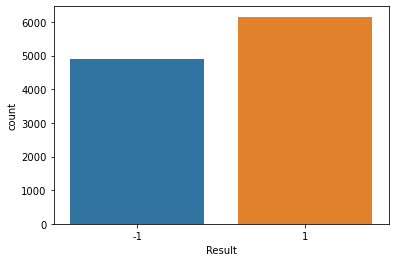

In [12]:
sns.countplot(data=df,x='Result')

3793
7262


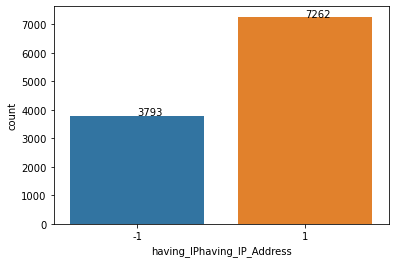

In [13]:
#fig, ax1 = plt.subplots(figsize=(4,4))
graph = sns.countplot(x='having_IPhaving_IP_Address', data=df)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    print(height)
    graph.text(p.get_x()+p.get_width()/2, height+0.1,height ,ha="left")

In [14]:
df.URLURL_Length.value_counts()

-1    8960
 1    1960
 0     135
Name: URLURL_Length, dtype: int64

([<matplotlib.patches.Wedge at 0x21573fc66d0>,
 [Text(-0.9107451388043135, 0.6168819110205063, 'a'),
  Text(0.8864147012240267, -0.6513593305188157, 'b'),
  Text(1.0991906083809881, -0.04219012262406223, 'c')])

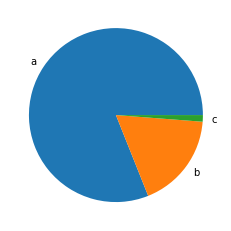

In [15]:
plt.pie(df['URLURL_Length'].value_counts(),labels=['a','b','c'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shortining_Service', ylabel='count'>

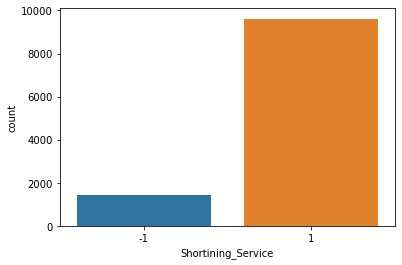

In [16]:
sns.countplot(df.Shortining_Service)

In [17]:
df['having_At_Symbol'].value_counts()

 1    9400
-1    1655
Name: having_At_Symbol, dtype: int64

([<matplotlib.patches.Wedge at 0x21574066ca0>,
 [Text(-0.9805679992985422, 0.4984841008012736, ''),
  Text(0.980568022634266, -0.4984840548975723, '')])

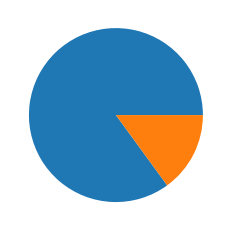

In [18]:
plt.pie(df['having_At_Symbol'].value_counts())

In [19]:
df['double_slash_redirecting'].value_counts()

 1    9626
-1    1429
Name: double_slash_redirecting, dtype: int64

In [20]:
df['Prefix_Suffix'].value_counts()

-1    9590
 1    1465
Name: Prefix_Suffix, dtype: int64

In [21]:
df['having_Sub_Domain'].value_counts()

 1    4070
 0    3622
-1    3363
Name: having_Sub_Domain, dtype: int64

In [22]:
df['SSLfinal_State'].value_counts()

 1    6331
-1    3557
 0    1167
Name: SSLfinal_State, dtype: int64

In [23]:
df['Domain_registeration_length'].value_counts()

-1    7389
 1    3666
Name: Domain_registeration_length, dtype: int64

In [24]:
df['Favicon'].value_counts()

 1    9002
-1    2053
Name: Favicon, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prefix_Suffix', ylabel='count'>

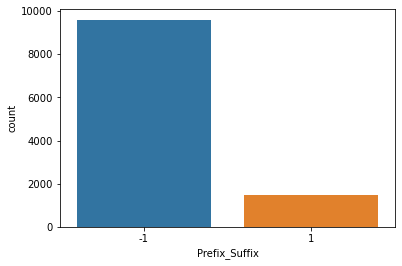

In [25]:
sns.countplot(df.Prefix_Suffix)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='having_Sub_Domain', ylabel='count'>

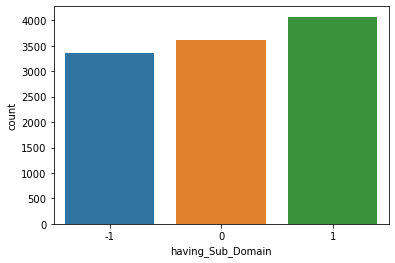

In [26]:
sns.countplot(df.having_Sub_Domain)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SSLfinal_State', ylabel='count'>

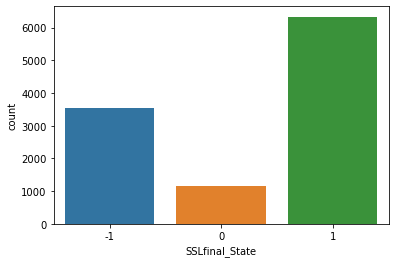

In [27]:
sns.countplot(df.SSLfinal_State)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Domain_registeration_length', ylabel='count'>

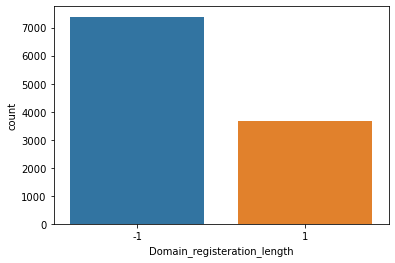

In [28]:
sns.countplot(df.Domain_registeration_length)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Favicon', ylabel='count'>

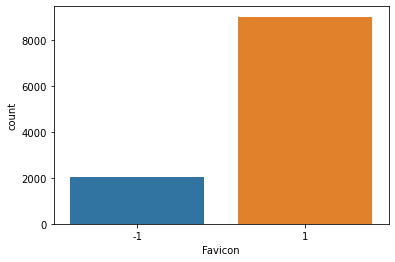

In [29]:
sns.countplot(df.Favicon)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='port', ylabel='count'>

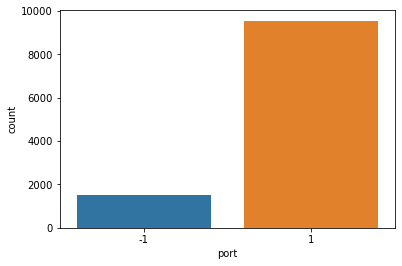

In [30]:
sns.countplot(df.port)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HTTPS_token', ylabel='count'>

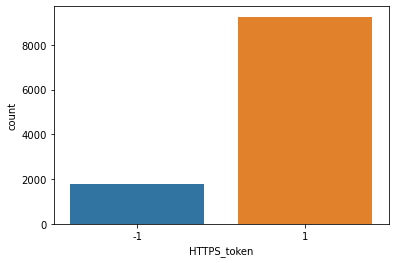

In [31]:
sns.countplot(df.HTTPS_token)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Request_URL', ylabel='count'>

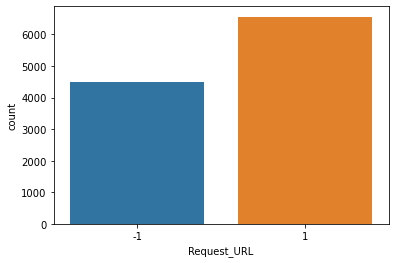

In [32]:
sns.countplot(df.Request_URL)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URL_of_Anchor', ylabel='count'>

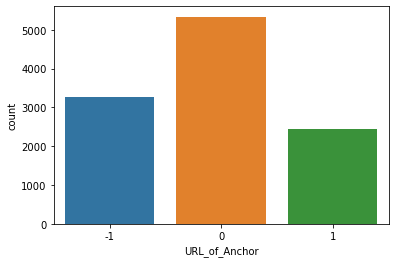

In [33]:
sns.countplot(df.URL_of_Anchor)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Links_in_tags', ylabel='count'>

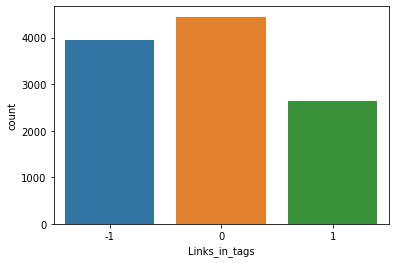

In [34]:
sns.countplot(df.Links_in_tags)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SFH', ylabel='count'>

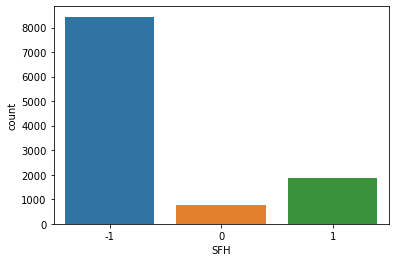

In [35]:
sns.countplot(df.SFH)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Submitting_to_email', ylabel='count'>

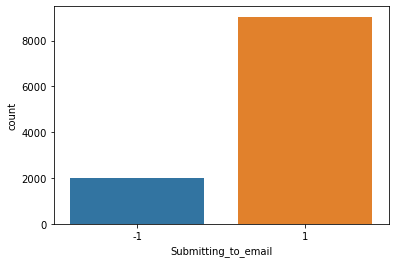

In [36]:
sns.countplot(df.Submitting_to_email)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Abnormal_URL', ylabel='count'>

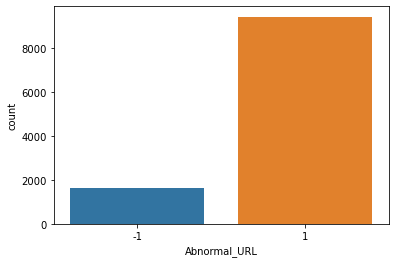

In [37]:
sns.countplot(df.Abnormal_URL)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Redirect', ylabel='count'>

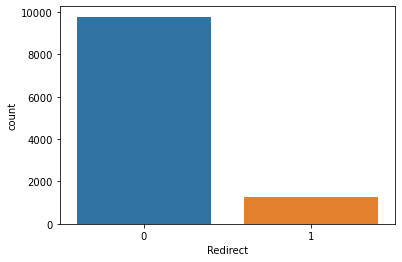

In [38]:
sns.countplot(df.Redirect)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='on_mouseover', ylabel='count'>

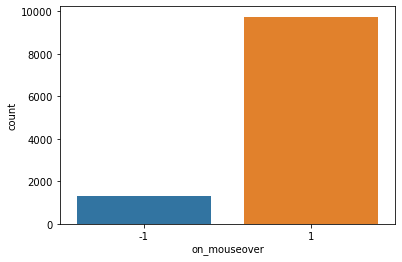

In [39]:
sns.countplot(df.on_mouseover)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RightClick', ylabel='count'>

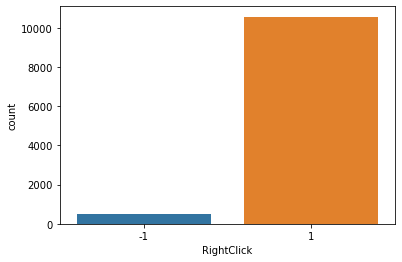

In [40]:
sns.countplot(df.RightClick)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popUpWidnow', ylabel='count'>

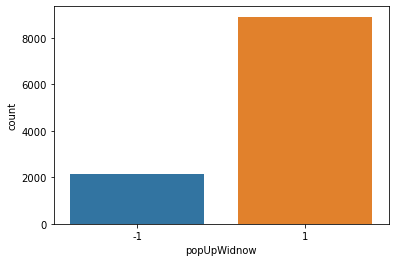

In [41]:
sns.countplot(df.popUpWidnow)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Iframe', ylabel='count'>

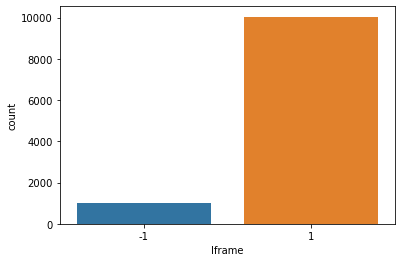

In [42]:
sns.countplot(df.Iframe)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_of_domain', ylabel='count'>

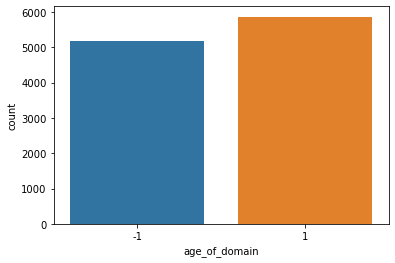

In [43]:
sns.countplot(df.age_of_domain)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DNSRecord', ylabel='count'>

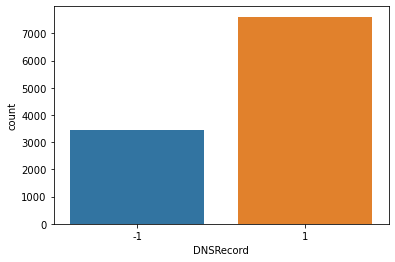

In [44]:
sns.countplot(df.DNSRecord)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='web_traffic', ylabel='count'>

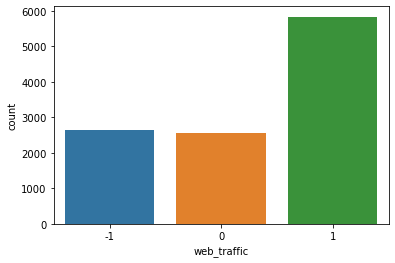

In [45]:
sns.countplot(df.web_traffic)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Page_Rank', ylabel='count'>

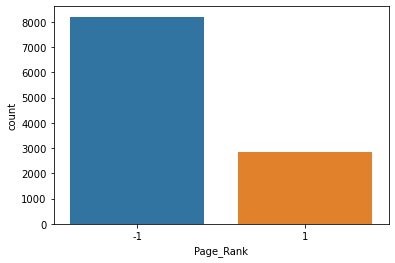

In [46]:
sns.countplot(df.Page_Rank)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Google_Index', ylabel='count'>

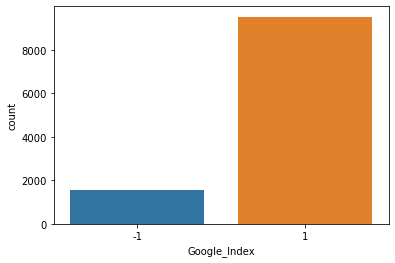

In [47]:
sns.countplot(df.Google_Index)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Links_pointing_to_page', ylabel='count'>

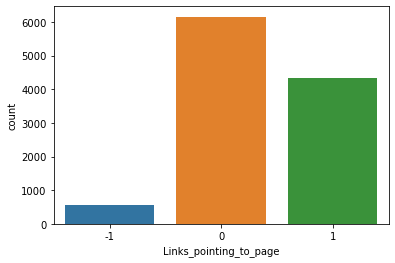

In [48]:
sns.countplot(df.Links_pointing_to_page)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Statistical_report', ylabel='count'>

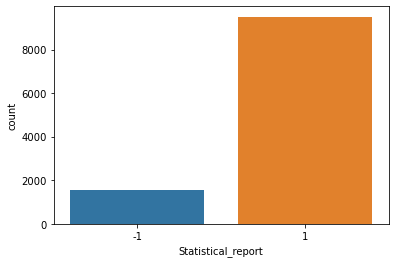

In [49]:
sns.countplot(df.Statistical_report)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

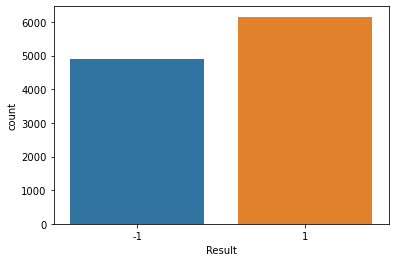

In [50]:
sns.countplot(df.Result)

# Multivariate Analysis

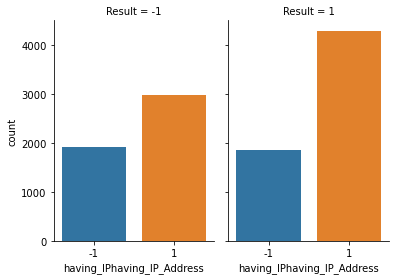

In [51]:
sns.catplot(x="having_IPhaving_IP_Address",col="Result",data=df, kind="count",height=4, aspect=.7)
plt.show()

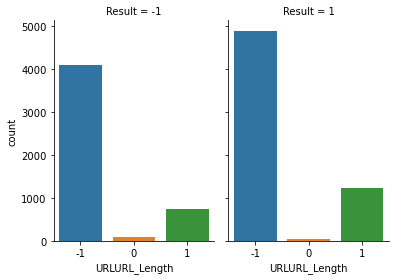

In [52]:
sns.catplot(x="URLURL_Length",col="Result",data=df, kind="count",height=4, aspect=.7)
plt.show()

In [53]:
df_train = df[df.URLURL_Length!=0]

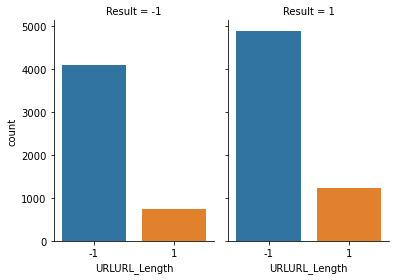

In [54]:
sns.catplot(x="URLURL_Length",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

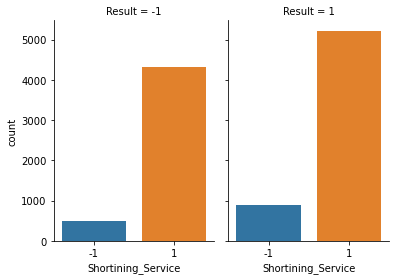

In [55]:
sns.catplot(x="Shortining_Service",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

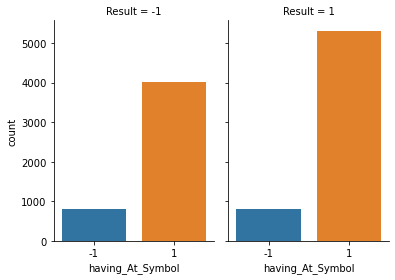

In [56]:
sns.catplot(x="having_At_Symbol",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

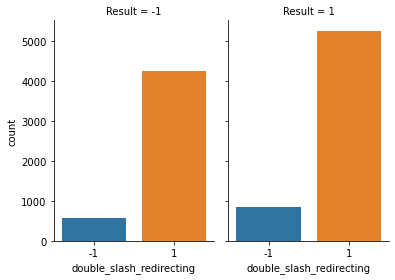

In [57]:
sns.catplot(x="double_slash_redirecting",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

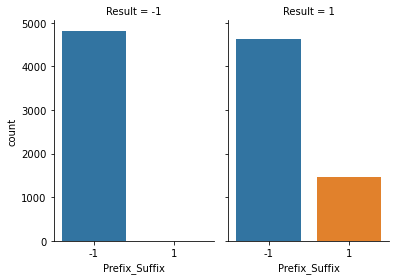

In [58]:
sns.catplot(x="Prefix_Suffix",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

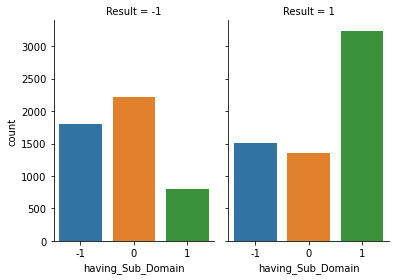

In [59]:
sns.catplot(x="having_Sub_Domain",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

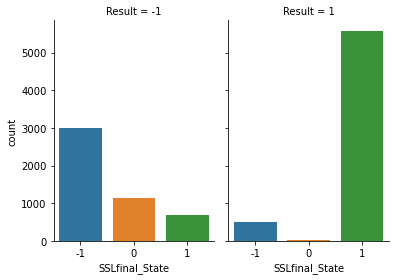

In [60]:
sns.catplot(x="SSLfinal_State",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

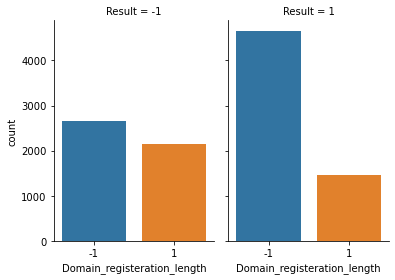

In [61]:
sns.catplot(x="Domain_registeration_length",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

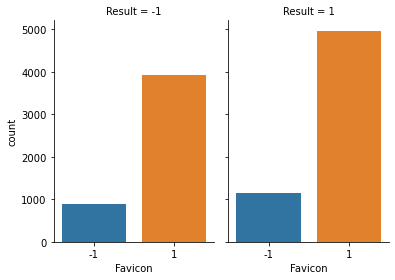

In [62]:
sns.catplot(x="Favicon",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

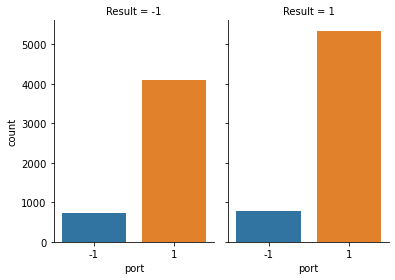

In [63]:
sns.catplot(x="port",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

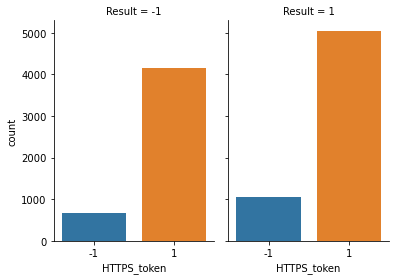

In [64]:
sns.catplot(x="HTTPS_token",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

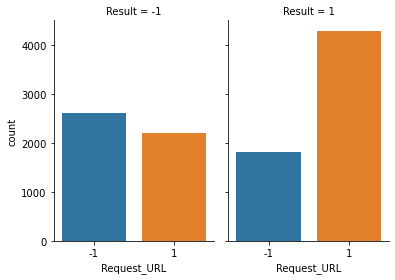

In [65]:
sns.catplot(x="Request_URL",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

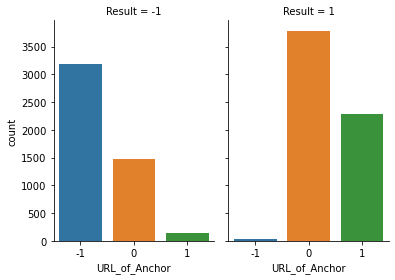

In [66]:
sns.catplot(x="URL_of_Anchor",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

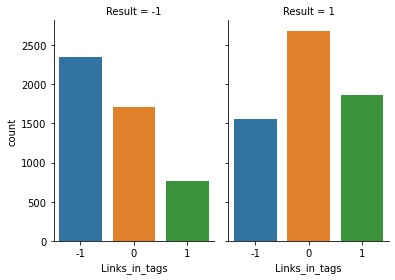

In [67]:
sns.catplot(x="Links_in_tags",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

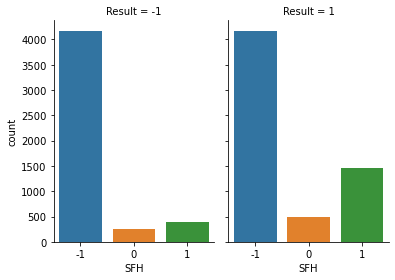

In [68]:
sns.catplot(x="SFH",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

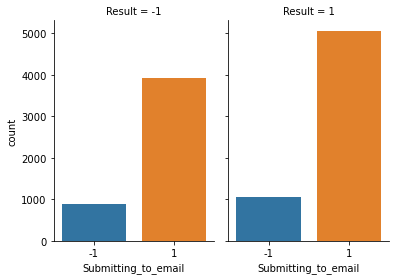

In [69]:
sns.catplot(x="Submitting_to_email",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

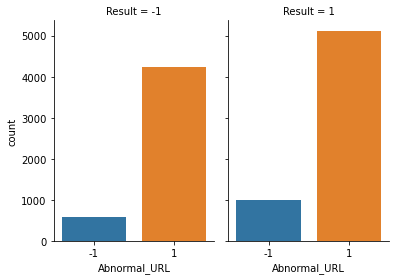

In [70]:
sns.catplot(x="Abnormal_URL",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

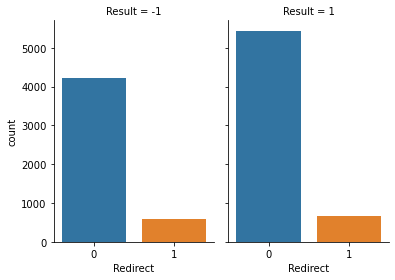

In [71]:
sns.catplot(x="Redirect",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

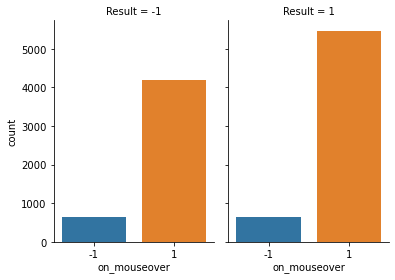

In [72]:
sns.catplot(x="on_mouseover",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

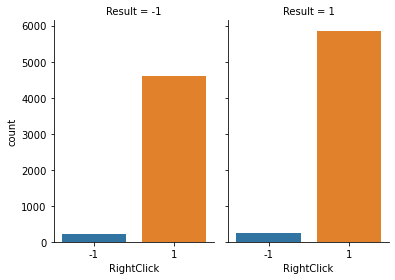

In [73]:
sns.catplot(x="RightClick",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

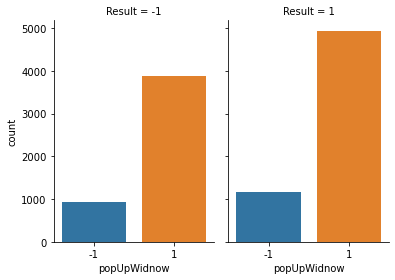

In [74]:
sns.catplot(x="popUpWidnow",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

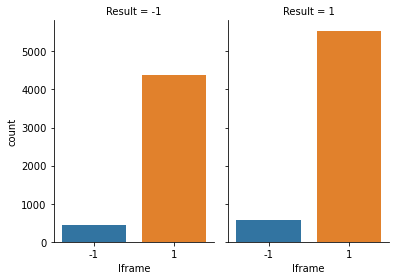

In [75]:
sns.catplot(x="Iframe",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

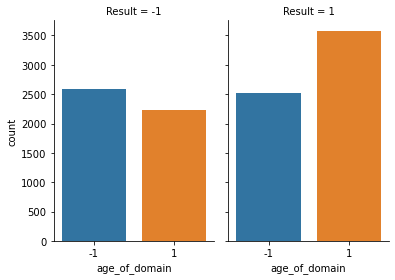

In [76]:
sns.catplot(x="age_of_domain",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

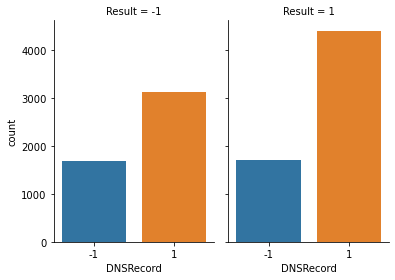

In [77]:
sns.catplot(x="DNSRecord",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

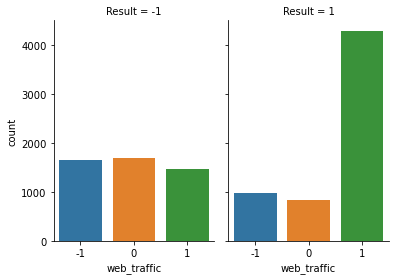

In [78]:
sns.catplot(x="web_traffic",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

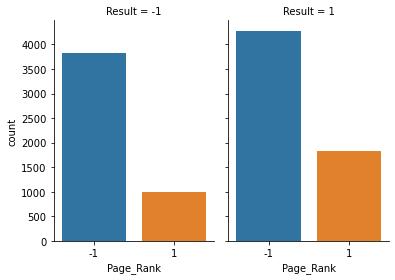

In [79]:
sns.catplot(x="Page_Rank",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

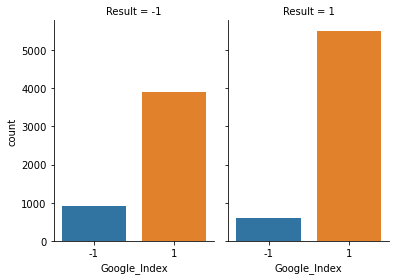

In [80]:
sns.catplot(x="Google_Index",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

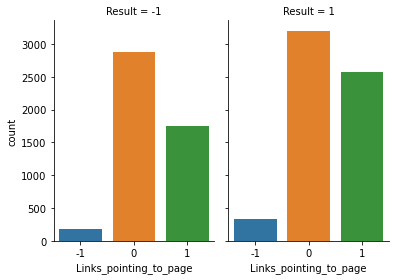

In [82]:
sns.catplot(x="Links_pointing_to_page",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

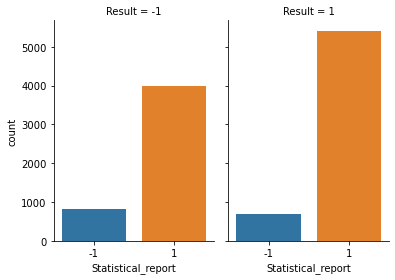

In [83]:
sns.catplot(x="Statistical_report",col="Result",data=df_train, kind="count",height=4, aspect=.7)
plt.show()

# Multivariate Analysis

In [84]:
corr = df.drop('index',axis=1).corr()

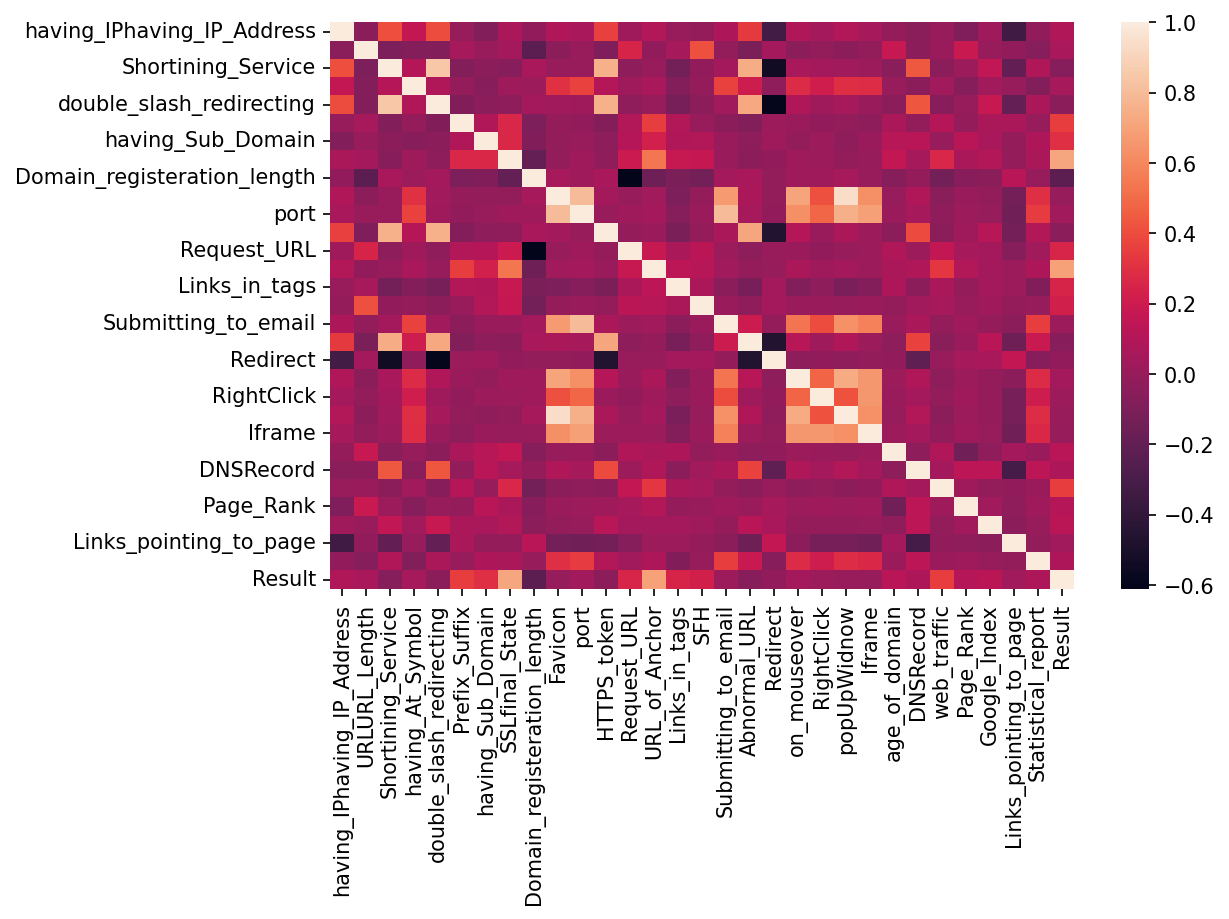

In [85]:
fig, ax = plt.subplots(figsize=(8,5),dpi=150)

sns.heatmap(corr)
plt.show()